In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/phishing_site_urls.csv')

In [ ]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [ ]:
df.shape

(549346, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [ ]:
df.isnull().sum()

,0
URL,0
Label,0


In [ ]:
df.Label.value_counts()

,count
Label,
good,392924
bad,156422


In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
df.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [ ]:
tokenizer.tokenize(df.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [ ]:
df["Tokenized_Text"] = df.URL.map(lambda t: tokenizer.tokenize(t))
df.head()

,URL,Label,Tokenized_Text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi..."


In [30]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
df["Text_Stemmed"] = df["Tokenized_Text"].map(lambda l:[stemmer.stem(word) for word in l])
df.head()

,URL,Label,Tokenized_Text,Text_Stemmed
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide..."


In [31]:
df["text"]=df["Text_Stemmed"].map(lambda l: ' '.join(l))
df.head()

,URL,Label,Tokenized_Text,Text_Stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [33]:
good_sites = df[df.Label == 'good']
bad_sites = df[df.Label == 'bad']
good_sites.head()

,URL,Label,Tokenized_Text,Text_Stemmed,text
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [34]:
bad_sites.head()

,URL,Label,Tokenized_Text,Text_Stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


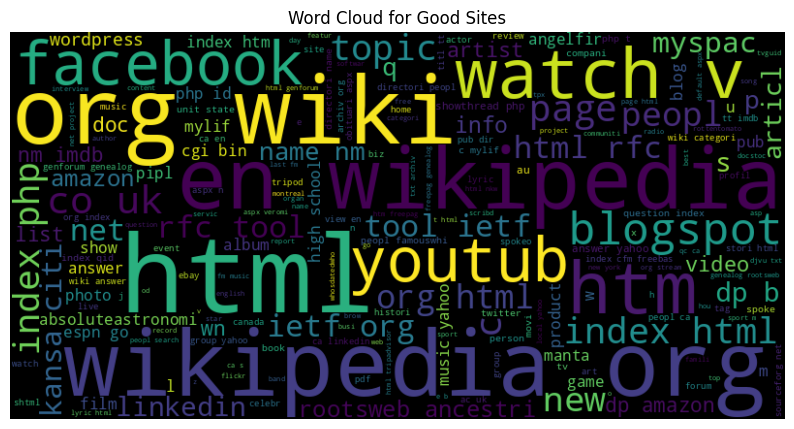

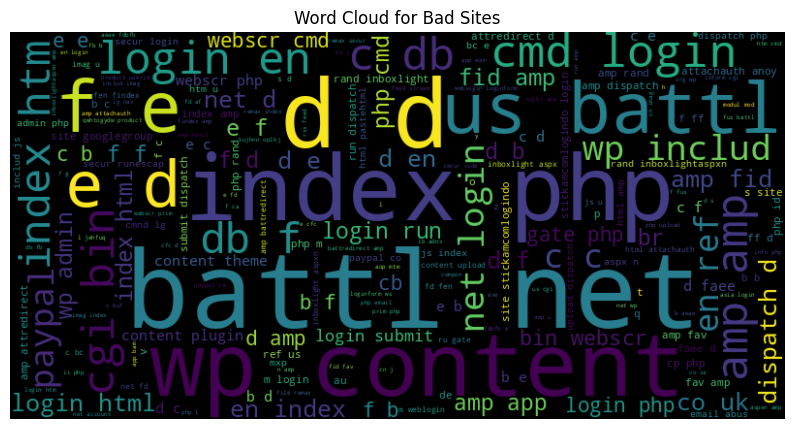

In [35]:
from wordcloud import WordCloud

# Generate a word cloud for good sites
good_text = " ".join(good_sites["text"])
good_wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(good_text)

plt.figure(figsize=(10, 7))
plt.imshow(good_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Good Sites')
plt.show()

# Generate a word cloud for bad sites
bad_text = " ".join(bad_sites["text"])
bad_wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(bad_text)

plt.figure(figsize=(10, 7))
plt.imshow(bad_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Bad Sites')
plt.show()

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
features = cv.fit_transform(df['text'])

In [38]:
features[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, df['Label'], test_size=0.2, random_state=0)

In [47]:
from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression()
lmodel.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
lmodel.score(X_test, y_test)

0.9640666241922272

In [49]:
lmodel.score(X_train, y_train)

0.9783150843276993

In [50]:
from sklearn.metrics import classification_report
print(classification_report(lmodel.predict(X_test),y_test,target_names=["Bad","Good"]))

              precision    recall  f1-score   support

         Bad       0.90      0.97      0.93     29264
        Good       0.99      0.96      0.98     80606

    accuracy                           0.96    109870
   macro avg       0.95      0.97      0.96    109870
weighted avg       0.97      0.96      0.96    109870



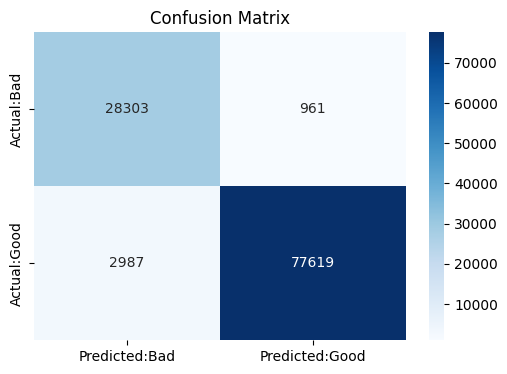

In [58]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
con_mat = pd.DataFrame(confusion_matrix(lmodel.predict(X_test),y_test),
                       columns=['Predicted:Bad', 'Predicted:Good'], index=['Actual:Bad', 'Actual:Good'])
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [59]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [63]:
mnb.score(X_test, y_test)

0.9576590516064439

In [64]:
mnb.score(X_train, y_train)

0.9743854044361921

In [61]:
from sklearn.metrics import classification_report
print(classification_report(mnb.predict(X_test),y_test,target_names=["Bad","Good"]))

              precision    recall  f1-score   support

         Bad       0.91      0.94      0.92     30548
        Good       0.98      0.97      0.97     79322

    accuracy                           0.96    109870
   macro avg       0.94      0.95      0.95    109870
weighted avg       0.96      0.96      0.96    109870



Text(0.5, 1.0, 'Confusion Matrix')

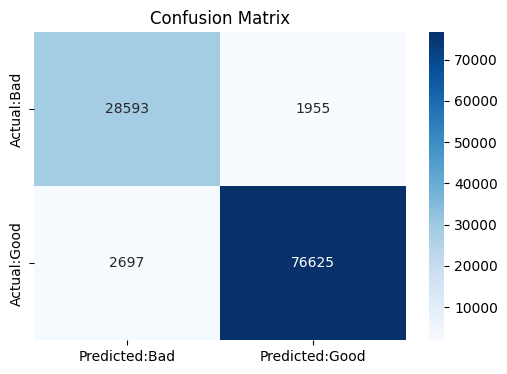

In [66]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(X_test),y_test),
                       columns=['Predicted:Bad', 'Predicted:Good'], index=['Actual:Bad', 'Actual:Good'])
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

In [72]:
import pickle
pickle.dump(lmodel, open('Phishing.pkl', 'wb'))
pickle.dump(cv, open('vectorizer.pkl', 'wb'))

In [73]:
predict_bad=["https://feiraolimpanomexxj.sbs/","http://feiraolimpanomexxj.sbs/","https://feiraolimpanomevbc.sbs/"]
predict_good=["https://www.youtube.com/watch?v=1Jj4T_HKSQE","www.google.com"]
predict_bad_cv = cv.transform(predict_bad)
predict_good_cv = cv.transform(predict_good)
lmodel.predict(predict_bad_cv)

array(['bad', 'bad', 'bad'], dtype=object)

In [74]:
lmodel.predict(predict_good_cv)

array(['good', 'good'], dtype=object)